# pySCENIC  workflow - results
including negative correlations (repressors)

------

In [6]:
from glob import glob
from os.path import basename, normpath
import pandas as pd
import pickle

In [57]:
results_dir_glob = "/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_*/"
results_dir = "/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/"

For each run:
* convert regulons.pkl to csv
* add size column for each regulon

In [47]:
for folder in glob(results_dir_glob):  # get a list of all sub directories
    with open(folder+'regulons.pkl', 'rb') as f: 
        regulon = pickle.load(f)
    # run = basename(normpath(folder))
    # print(run)
        # get regulon results from pkl file to df and save as csv - for readability
        reg_df = pd.DataFrame({
            'TF': [reg.transcription_factor for reg in regulon],
            'genes': [list(reg.genes) for reg in regulon],
            'score': [reg.score for reg in regulon]
        })
        reg_df['size'] = reg_df['genes'].apply(lambda x: len(x))
        reg_df = reg_df.set_index('TF')
        # reg_df.to_csv(folder + 'regulons.csv')

/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_12/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_2/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_5/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_4/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_3/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_10/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_11/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_6/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_1/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_8/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_9/
/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_7/


convert modules pkl to csv

In [ ]:
for folder in glob(results_dir_glob):  # get a list of all sub directories
    with open(folder+'modules.pkl', 'rb') as f: 
        modules = pickle.load(f)
    # run = basename(normpath(folder))
    # print(run)
        # get regulon results from pkl file to df and save as csv - for readability
        modules_df = pd.DataFrame({
            'TF': [mod.transcription_factor for mod in modules],
            
        })
        reg_df['size'] = reg_df['genes'].apply(lambda x: len(x))
        reg_df = reg_df.set_index('TF')
        # reg_df.to_csv(folder + 'regulons.csv')

28 repressing TFs:

In [136]:
with open("/Users/danabarilan/Documents/forMasters/Intenship/code/results_2709/run_1/modules.pkl", 'rb') as f:
    modules = pickle.load(f)
# modules[0]
# len([mod.context for mod in modules]) - sum(['activating' in mod.context for mod in modules])
sum(['repressing' in mod.context for mod in modules])

28

In [157]:
repressors = [mod for mod in modules if 'repressing' in mod.context]
# repressors[0].transcription_factor
repressors[0].gene2weight.keys()

frozendict.keys(['MFS14', 'CG4066', 'gt', 'akirin', 'CG1504', 'His2Av', 'kni', 'klg', 'sky', 'spen', 'pum', 'CG6153', 'lolal', 'corto', 'N', 'gcm', 'Lhr', 'CycE', 'twin', '18w', 'rin', 'CG33995', 'dap', 'Nse4', 'Nup153', 'Strn-Mlck', 'CG42342', 'Sema1a', 'Unr', 'CG4789', 'Sap30', 'kune', 'eIF1A', 'skd', 'Bacc', 'p23', 'CG16865', 'Not1', 'ft', 'CG17202', 'klar', 'CG32767', 'Cka', 'ptc', 'ppl', 'Gbeta13F', 'hth', 'Akt1', 'YL-1', 'Crk', 'mt:ND1'])

In [179]:
repressors_df = pd.DataFrame({'TF': [mod.transcription_factor for mod in repressors],
              'gene': [mod.gene2weight.keys() for mod in repressors]})

In [180]:
repressors_df = repressors_df.explode('gene').drop_duplicates()

In [196]:
print(repressors_df.groupby(['TF', 'gene']).size().to_frame('count'))

                      count
TF     gene                
mt:ND1 14-3-3epsilon      1
       18w                1
       Akap200            1
       Akt1               1
       Bacc               1
...                     ...
sna    klu                1
       l(2)05714          1
       mars               1
       sna                1
       uzip               1

[758 rows x 1 columns]


In [197]:
repressors[0]

Regulon(name='Regulon for mt:ND1', gene2weight=frozendict.frozendict({'MFS14': 1.2152877645230011, 'CG4066': 0.7436124783260876, 'gt': 0.47189027017432505, 'akirin': 0.3826722877530795, 'CG1504': 0.3509317868688892, 'His2Av': 0.2403560952268202, 'kni': 0.22262415342889075, 'klg': 0.20108297446968007, 'sky': 0.18030181366501874, 'spen': 0.17344351518975298, 'pum': 0.15534608273757966, 'CG6153': 0.13721172871429638, 'lolal': 0.12963659117807466, 'corto': 0.12957851252776006, 'N': 0.12510586644303667, 'gcm': 0.12472055581881092, 'Lhr': 0.1218497419281622, 'CycE': 0.12083558226864033, 'twin': 0.11706634356538553, '18w': 0.11651962610957937, 'rin': 0.11573003969167565, 'CG33995': 0.11548691487569794, 'dap': 0.11393492382869301, 'Nse4': 0.10338259511521801, 'Nup153': 0.10239088411140634, 'Strn-Mlck': 0.09628686482179899, 'CG42342': 0.09357913525882372, 'Sema1a': 0.09321157966154826, 'Unr': 0.09128481597322659, 'CG4789': 0.08861466254388123, 'Sap30': 0.08636083475943326, 'kune': 0.08442306233

------------

# Collect consistent results

TFs and genes that appear in >80% of the runs (9)

## TFs

In [20]:
from collections import Counter

In [23]:
tfs_counter = Counter()
for folder in glob(results_dir_glob):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    tfs_counter.update(regulons_df.index)  # count appearance on TFs between different runs (overall 12 runs)

In [24]:
tfs_counter

Counter({'Abd-B': 9,
         'B-H2': 10,
         'Blimp-1': 5,
         'C15': 4,
         'CG15812': 9,
         'CG3065': 4,
         'Clk': 5,
         'CrebB': 10,
         'D': 8,
         'Dll': 5,
         'Dr': 7,
         'E(spl)m5-HLH': 9,
         'E(spl)m7-HLH': 12,
         'E(spl)m8-HLH': 12,
         'E(spl)mbeta-HLH': 6,
         'E2f1': 12,
         'E2f2': 9,
         'ERR': 10,
         'EcR': 9,
         'FoxK': 12,
         'Gsc': 11,
         'HDAC1': 6,
         'HLH54F': 11,
         'Hmx': 12,
         'Hrb98DE': 3,
         'Kr': 10,
         'Mad': 3,
         'Mef2': 12,
         'Myc': 12,
         'NFAT': 4,
         'Pdp1': 4,
         'Rbf': 2,
         'SREBP': 8,
         'Sin3A': 8,
         'Sox102F': 2,
         'Sox14': 4,
         'Sox21a': 12,
         'SoxN': 7,
         'Stat92E': 11,
         'Tbp': 2,
         'Tet': 10,
         'TfIIB': 1,
         'Trf2': 8,
         'Ubx': 12,
         'Uev1A': 1,
         'Vsx1': 11,
         'Xbp1': 1

TFs counts distribution

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
tfs_counts_series = pd.Series(tfs_counter).sort_values(ascending=False)  # sorted Series of TFs counts 

plot TFs count distribution

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


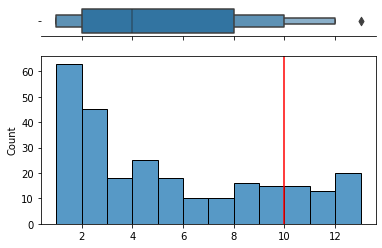

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxenplot(tfs_counts_series, ax=ax_box)
sns.histplot(tfs_counts_series, ax=ax_hist, bins=12)
sns.despine(ax=ax_box, left=True)
plt.axvline(10, color='red')

Produces list of TFs that appear in >80% of the runs

In [37]:
tfs_80 = tfs_counts_series[tfs_counts_series > 9]  # 9/12 = 75%

In [38]:
len(tfs_80)

48

48 TFs that appear in 10-12 times of the runs 

## Genes 

Save for each run the consistant regulons

In [43]:
for folder in glob(results_dir_glob):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    regulons_top_freq = regulons_df.loc[[tf for tf in regulons_df.index if tf in tfs_80.index]]  # save regulons of the best confidence TFs (>80%)
    regulons_top_freq.to_csv(folder + 'regulons_top80.csv')

calculate gene counts for the same TF (among top 80% TFs)

In [40]:
from ast import literal_eval
import os

In [58]:
all_dfs = pd.concat([pd.read_csv(folder + 'regulons_top80.csv', index_col=0) for folder in glob(results_dir_glob)])
all_dfs_genes = all_dfs['genes']  # keep only genes column, discard size of regulon and score
all_dfs_genes = all_dfs_genes.apply(literal_eval) # convert string to list of genes
all_dfs_genes = all_dfs_genes.explode()  # convert to couples of TF-gene
all_dfs_genes = pd.DataFrame(all_dfs_genes).rename({'genes': 'gene'}, axis='columns') # to dataframe
gene_counts = all_dfs_genes.groupby(['TF', 'gene']).size().to_frame('count') # count couples fo TF - gene
gene_counts.to_csv(results_dir+"gene_counts.csv") # save to csv 

In [59]:
gene_counts = gene_counts.reset_index()

In [60]:
len(gene_counts.gene.unique())

2273

2273 unique genes

In [61]:
gene_counts

,TF,gene,count
0,Aef1,Aef1,3
1,Aef1,Br140,1
2,Aef1,CG10466,1
3,Aef1,CG13675,2
4,Aef1,CG15480,1
...,...,...,...
4149,wor,uif,4
4150,wor,unc-13-4A,1
4151,wor,vn,1
4152,wor,wech,2


Plot genes counts (from TF-genes couples!)

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


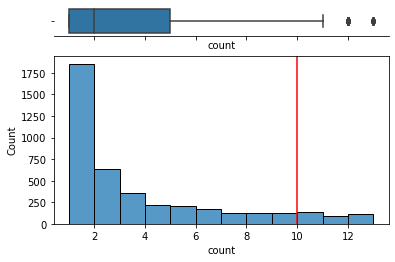

In [62]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(gene_counts['count'], ax=ax_box)
sns.histplot(gene_counts['count'], ax=ax_hist, bins=12)
sns.despine(ax=ax_box, left=True)
plt.axvline(10, color='red')

save AUCell score matrix of only top 80% for each run

In [64]:
for folder in glob(results_dir_glob):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)
    # keep AUC_mtx TFs that are in reg_top80:
    auc_mtx_top80 = auc_mtx.loc[:, [col for col in auc_mtx if col.strip("(+)") in reg_top80.index.values.tolist()]]
    auc_mtx_top80.to_csv(folder + 'AUCell_mat_top80.csv')

--------------

### Heatmaps for top TFs for each run (AUCell score)

get cell types

In [63]:
types_df = pd.read_csv("../data/cell_type.csv", index_col=0)

create and save heatmaps as png for each run

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: User

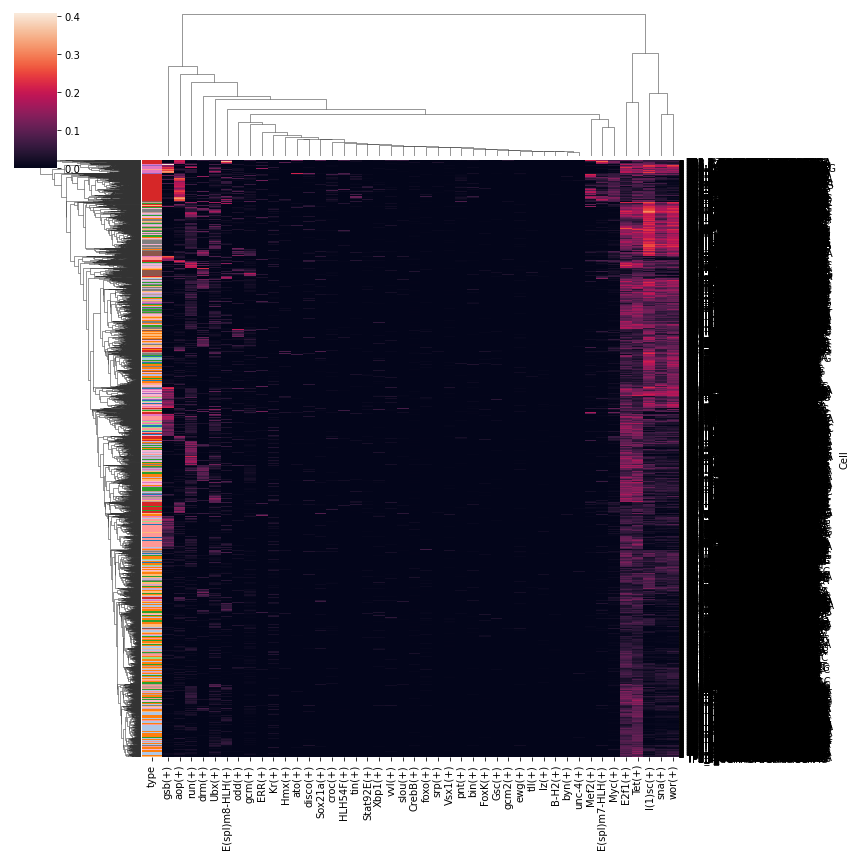

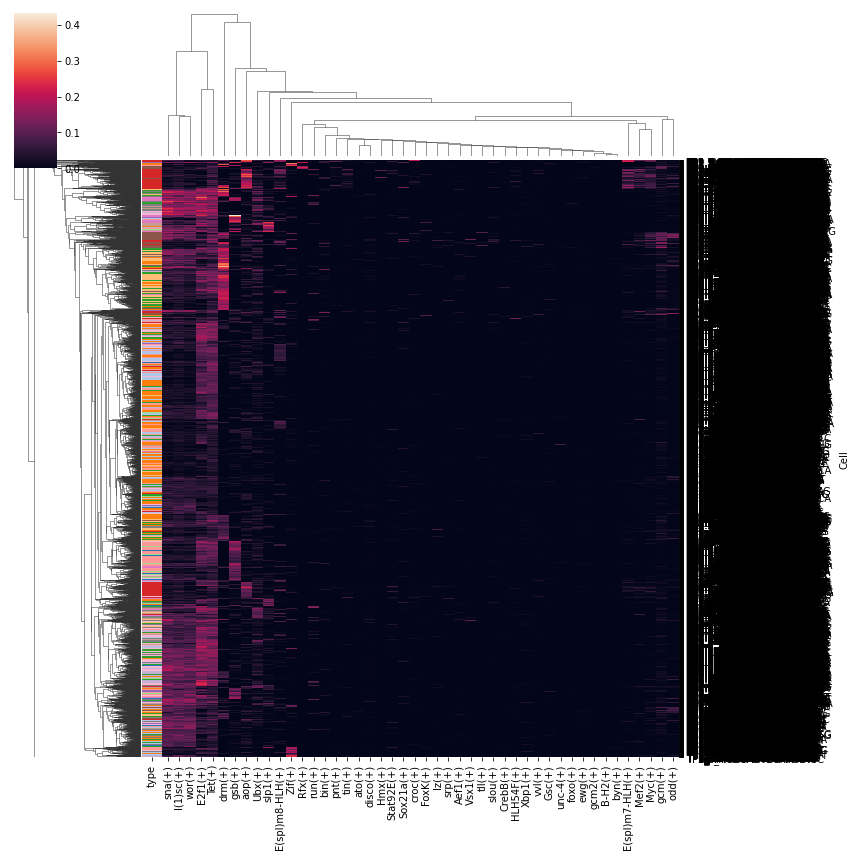

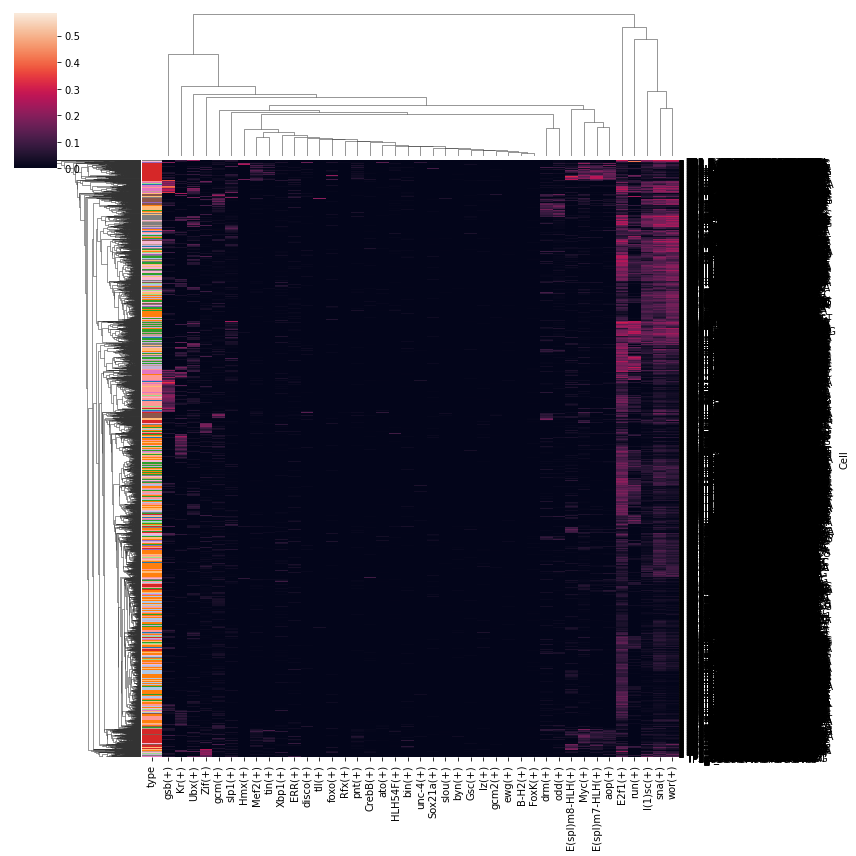

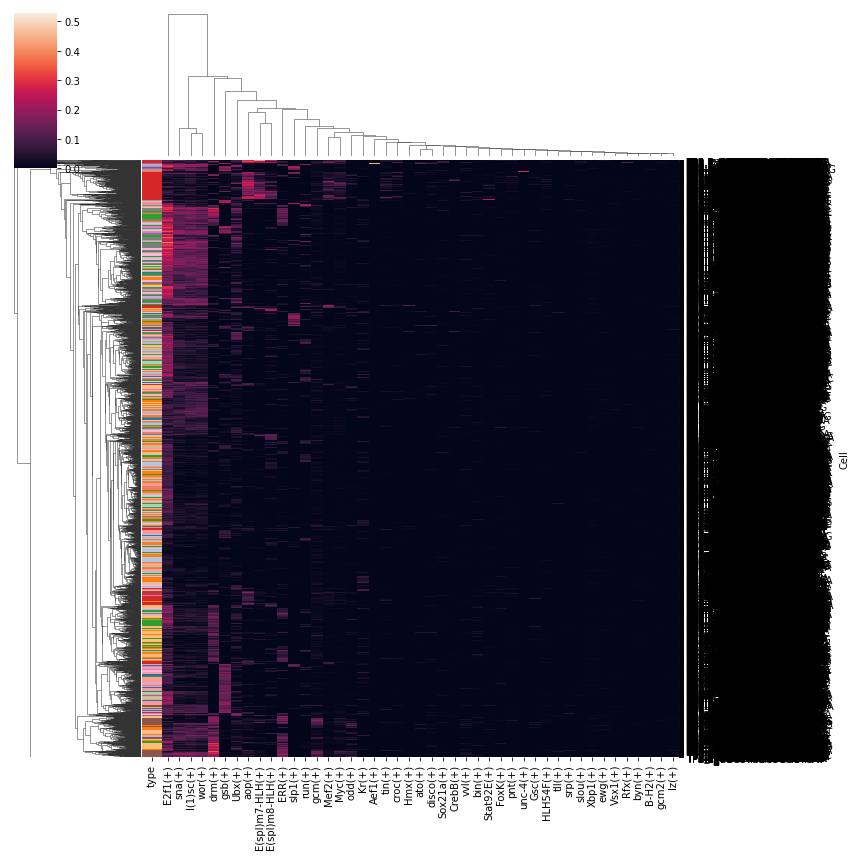

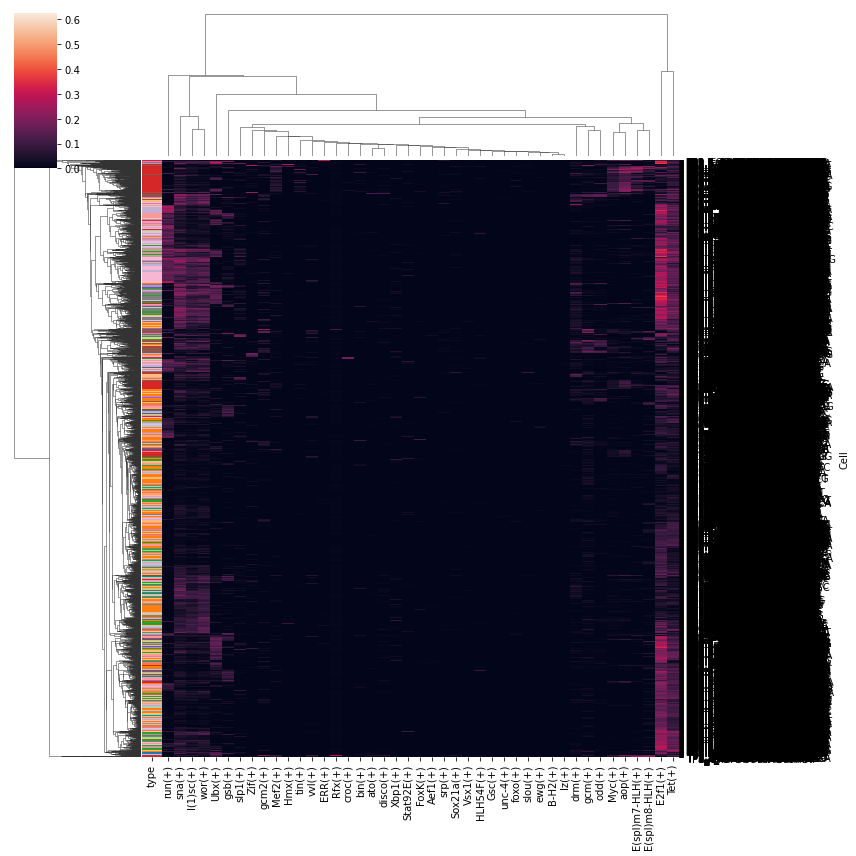

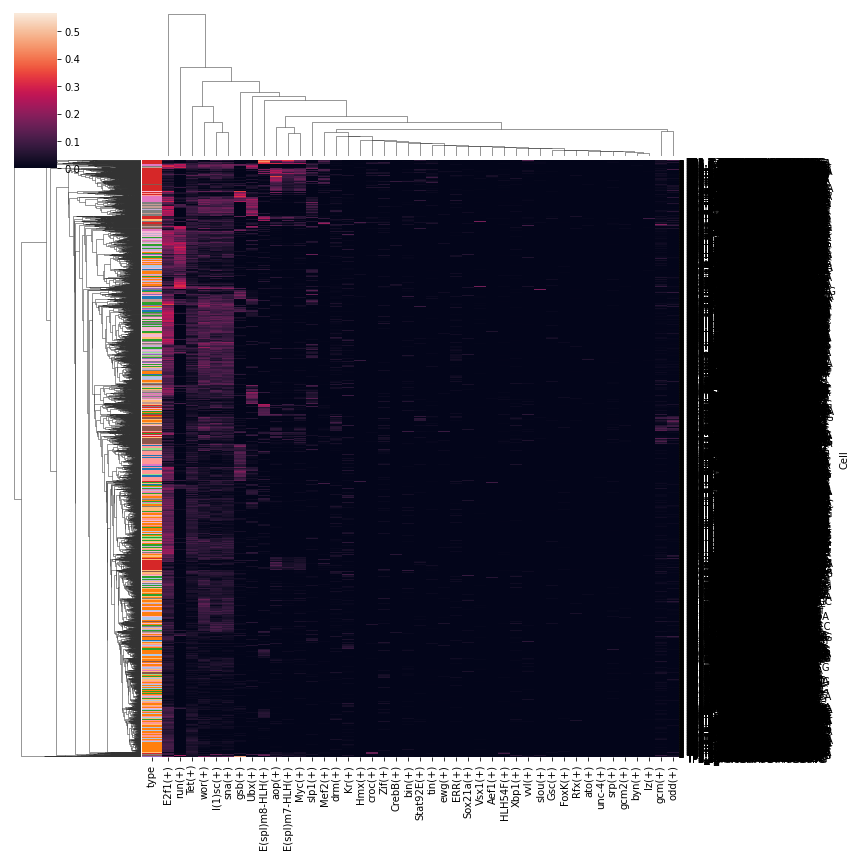

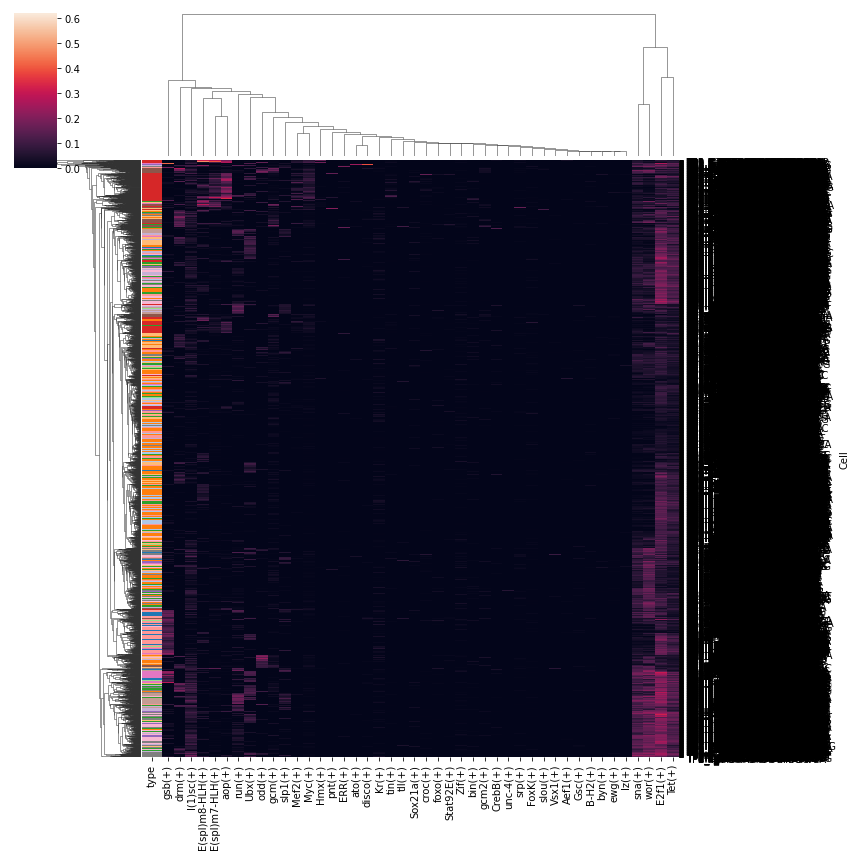

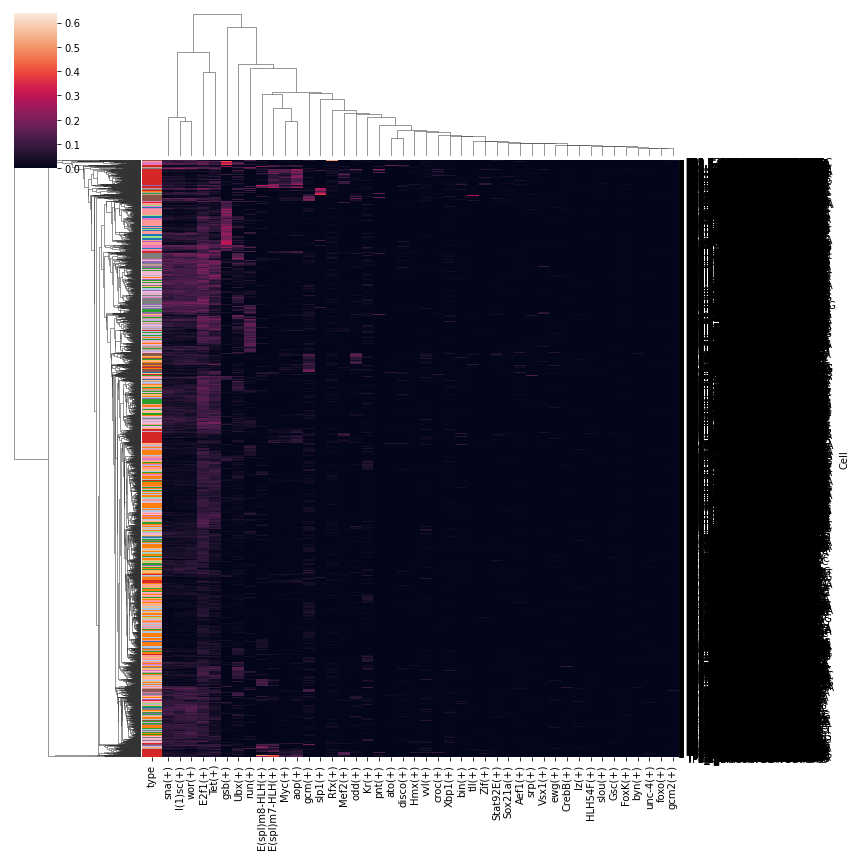

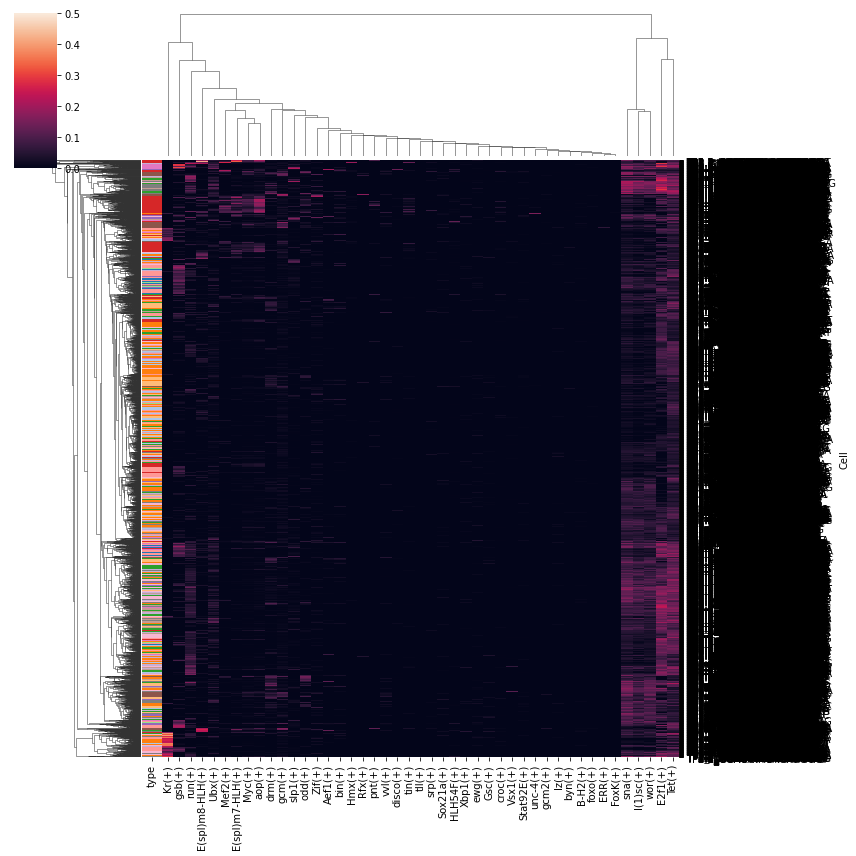

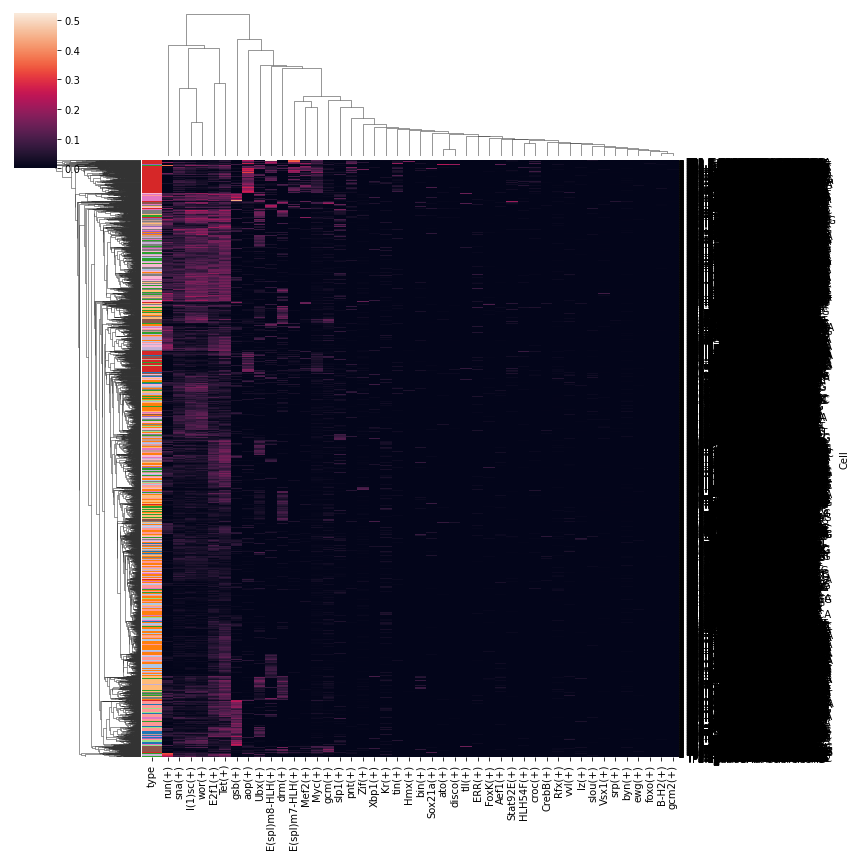

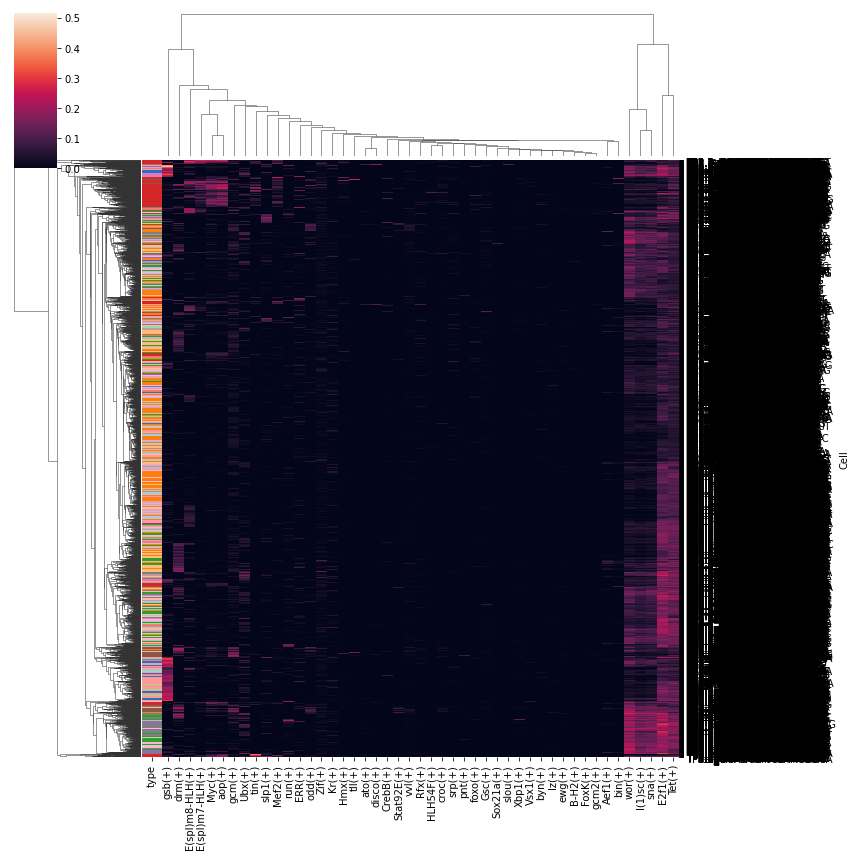

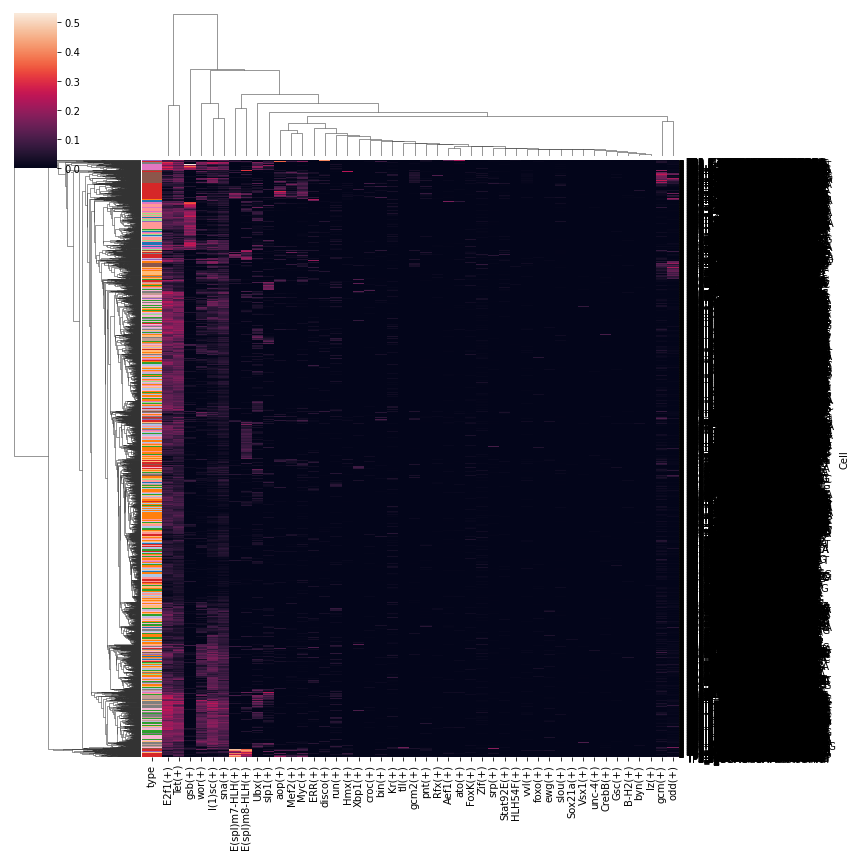

In [66]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

for folder in glob(results_dir_glob):
    auc_mtx_top80 = pd.read_csv(folder + "AUCell_mat_top80.csv", index_col=0)
    # fix colors:
    row_colors = auc_mtx_top80.merge(cell_colors, how='left', left_index=True, right_index=True).type
    # create heatmap abd save to results
    ax= sns.clustermap(auc_mtx_top80, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    ax.savefig(folder + "top80_heatmap.png")

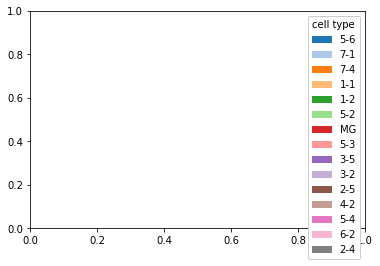

In [67]:
from matplotlib.patches import Patch

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title="cell type", framealpha=1)

## AUCell mean score per cell type

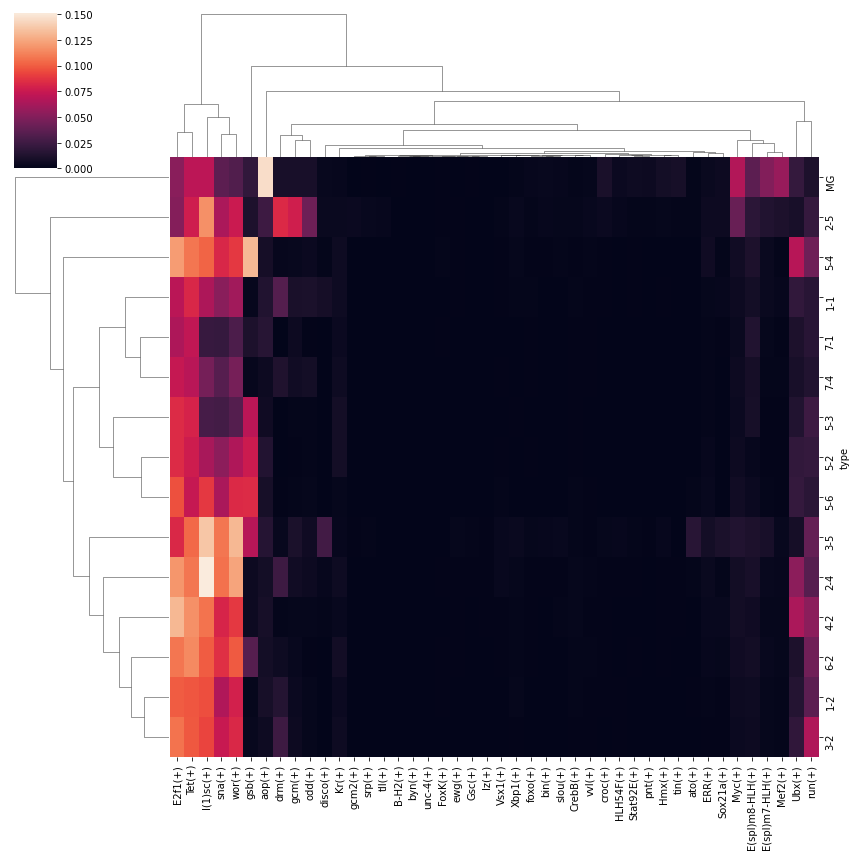

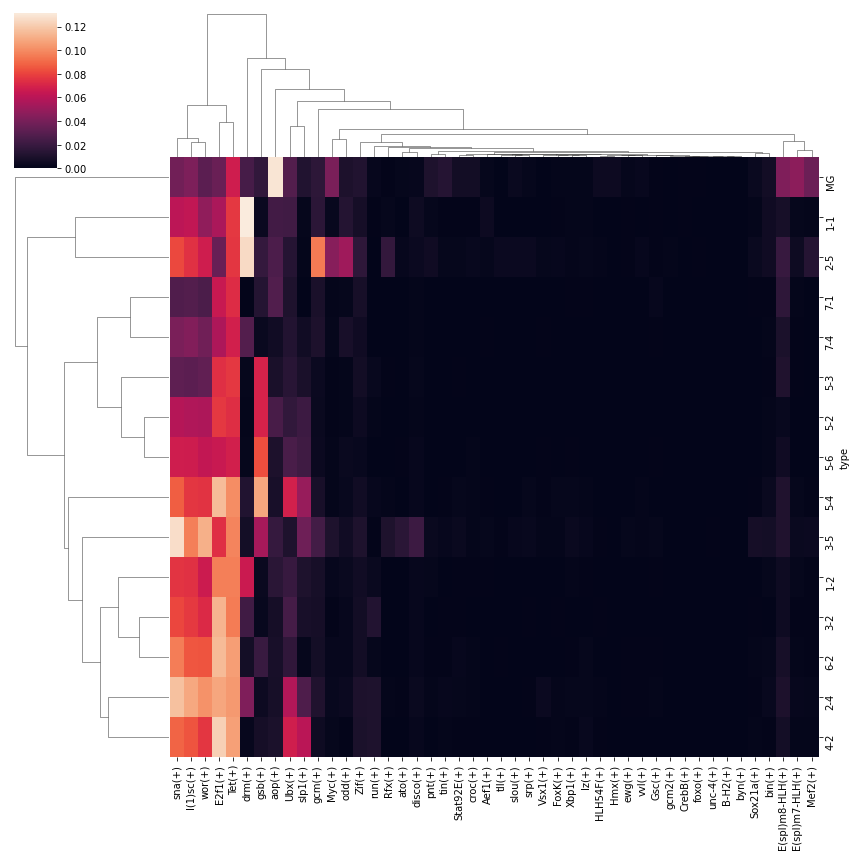

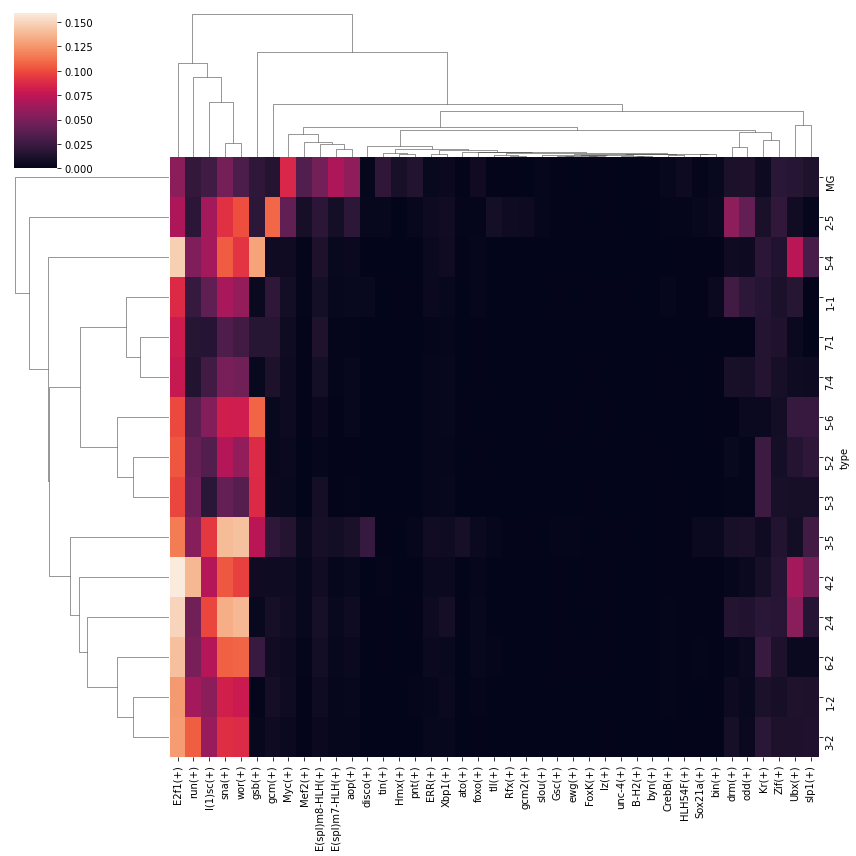

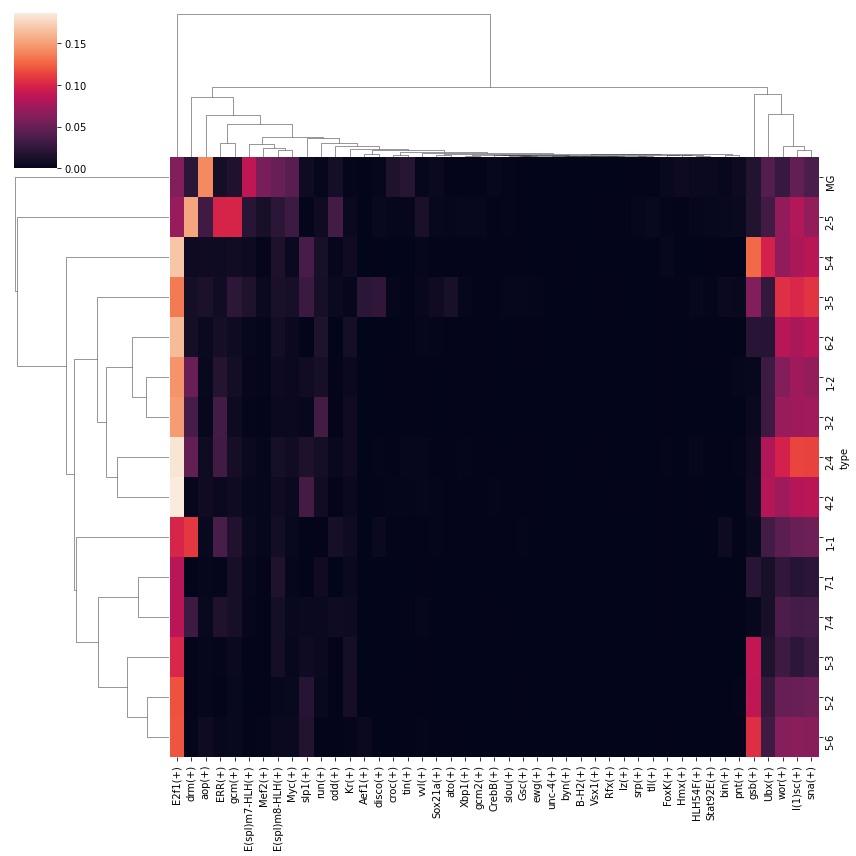

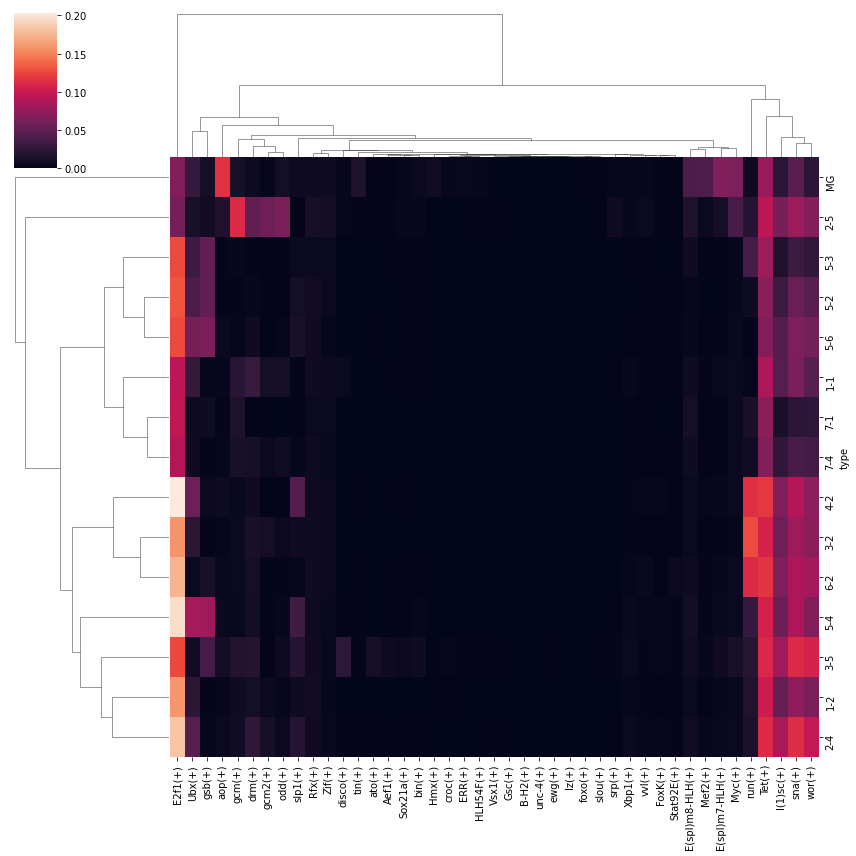

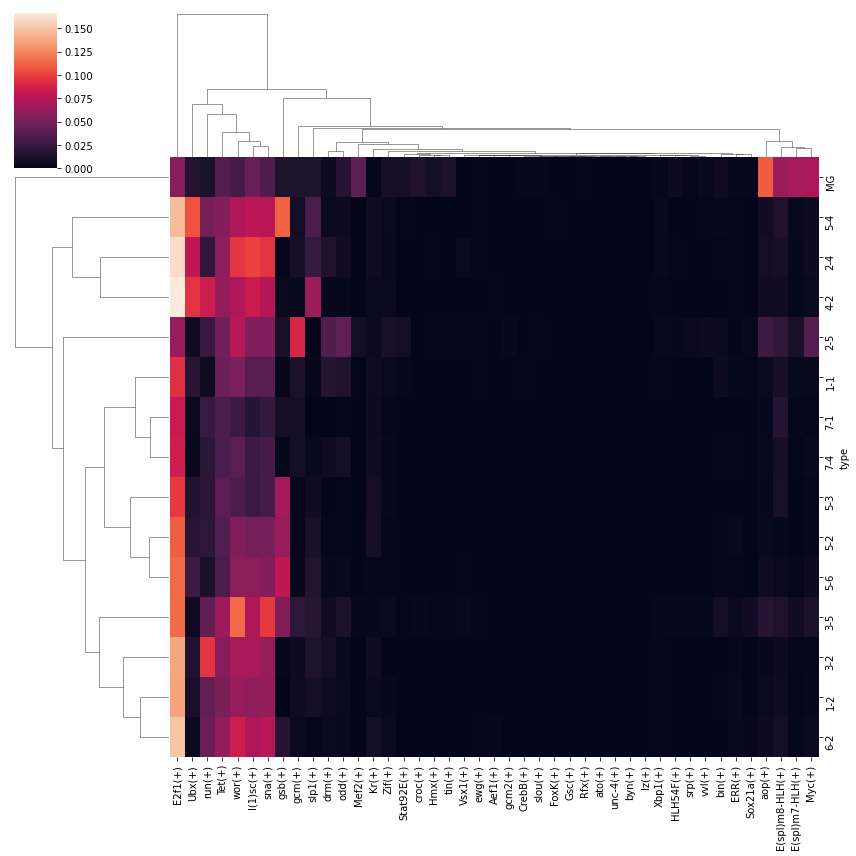

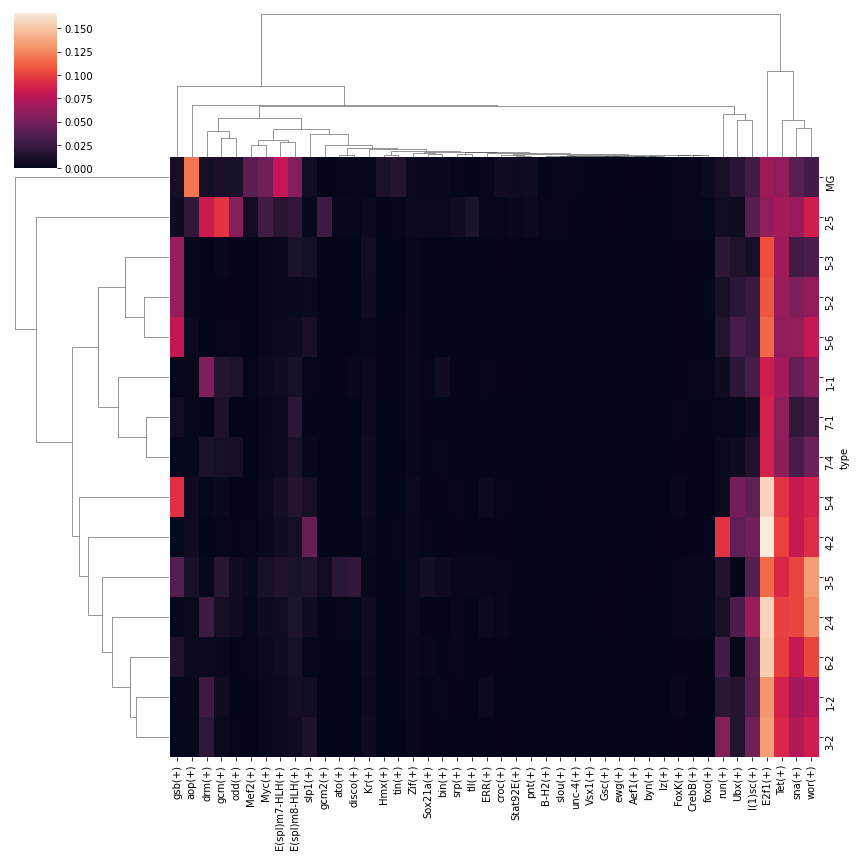

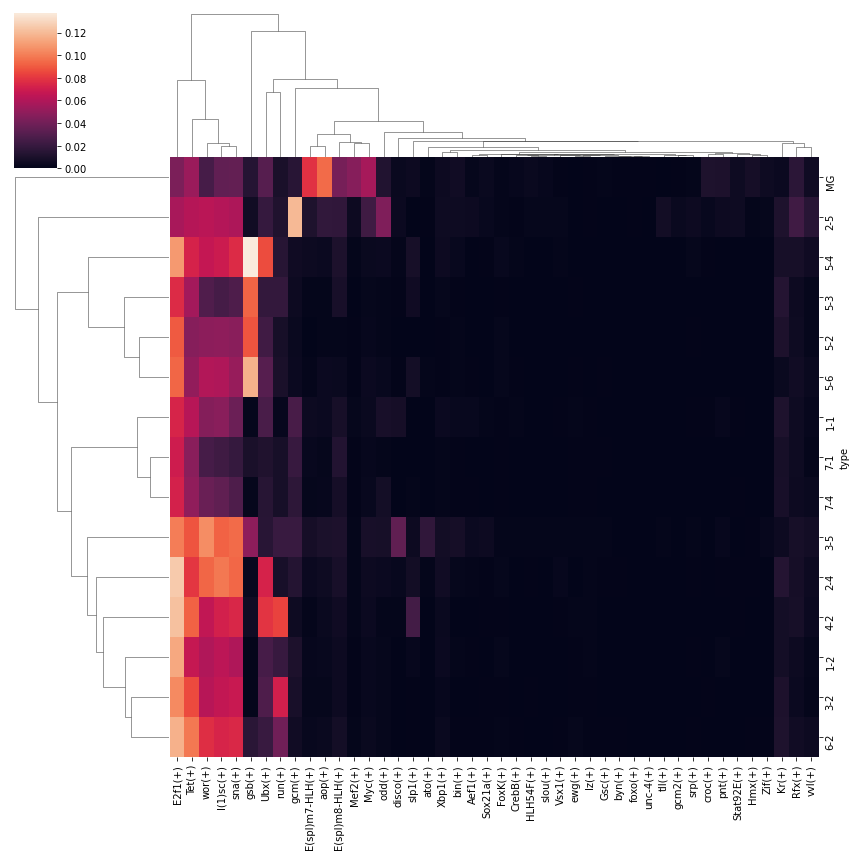

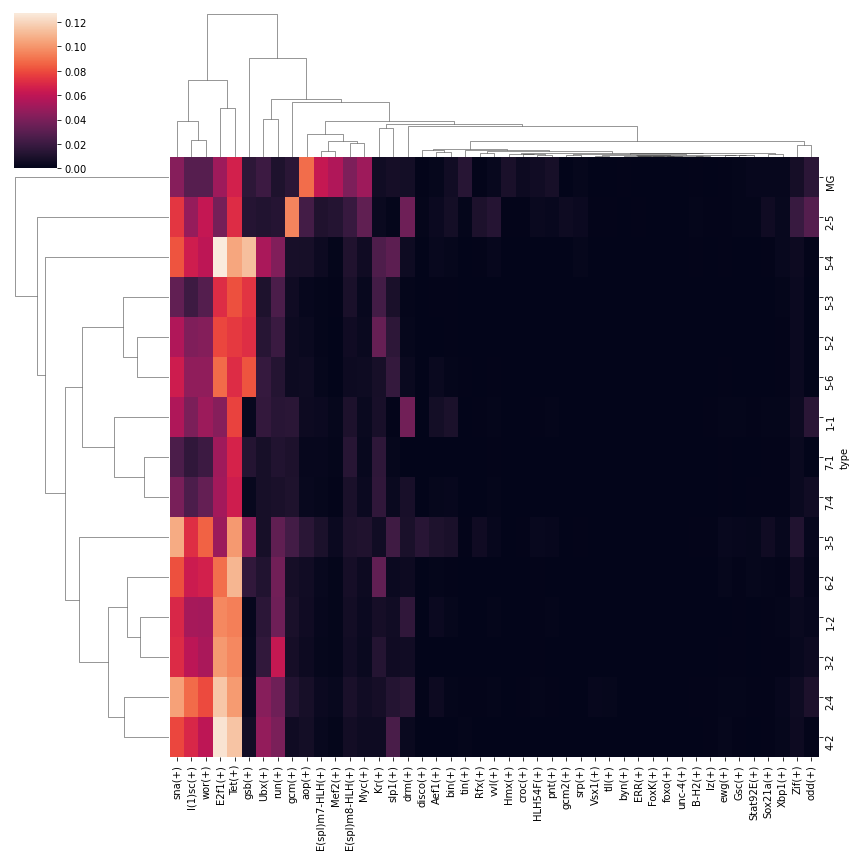

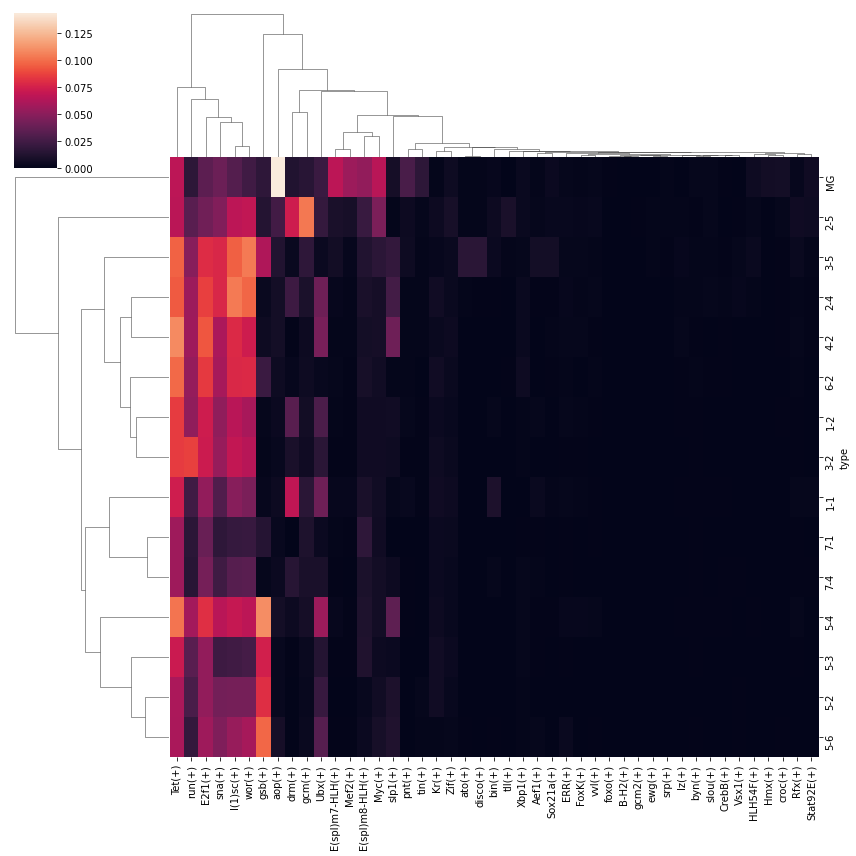

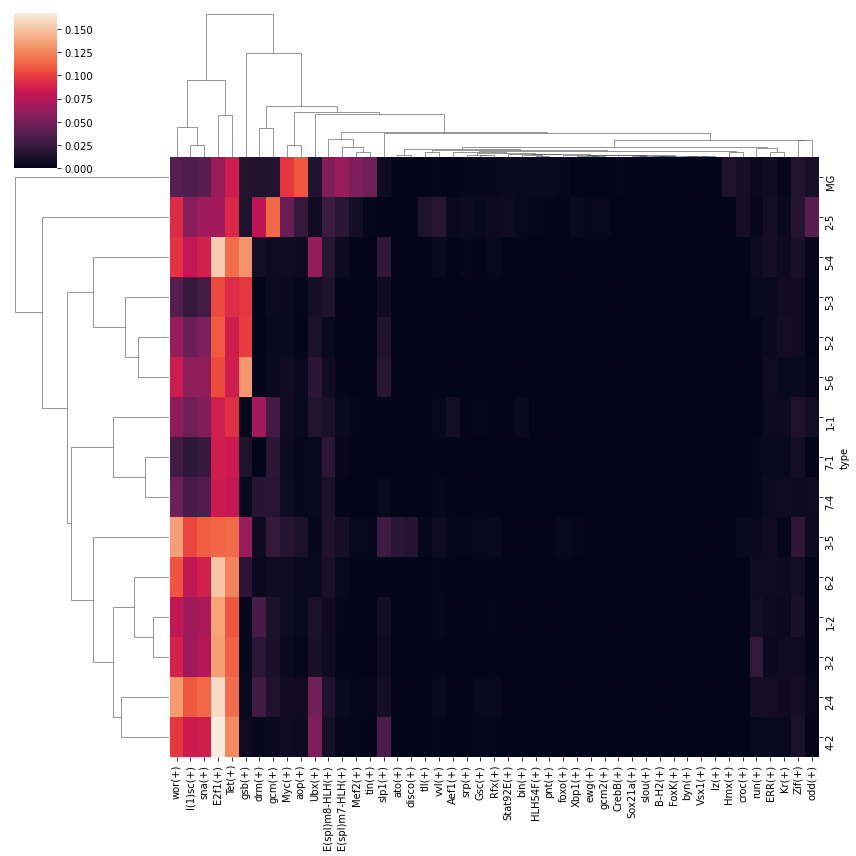

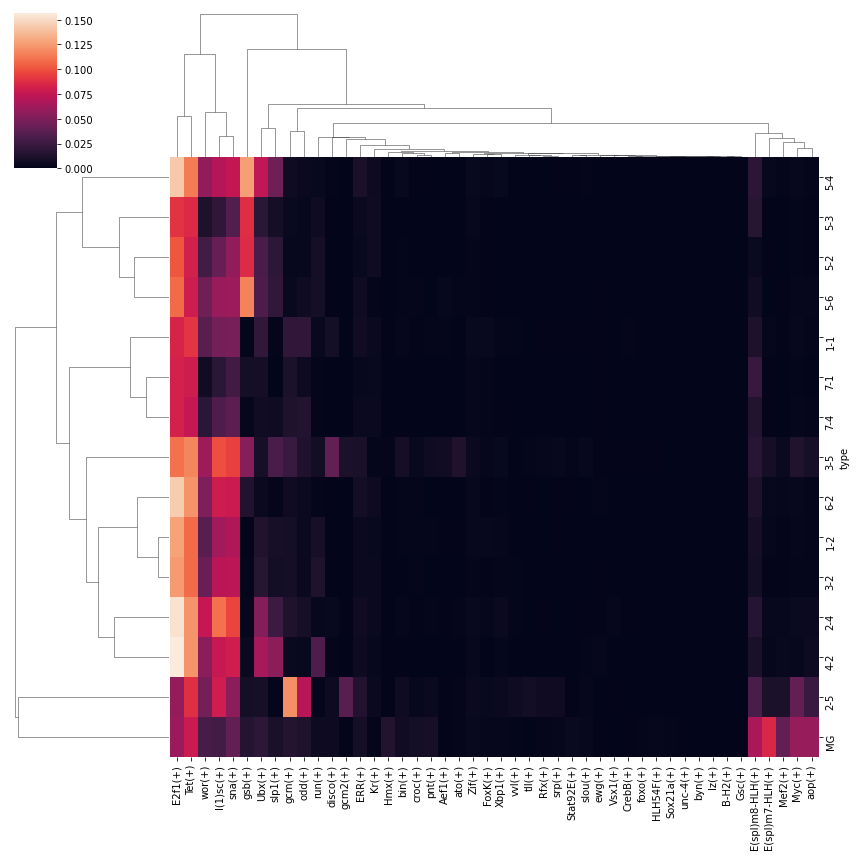

In [71]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

# auc_mtx = pd.read_csv("../results/run_01/top80_heatmap.png", index_col=0)
# types df : cell (index) | type
for folder in glob(results_dir_glob):
    auc_mtx_top80 = pd.read_csv(folder + "AUCell_mat_top80.csv", index_col=0)
    auc_type = auc_mtx_top80.merge(types_df, how='left', left_index=True, right_index=True)
    auc_type = auc_type.groupby("type").mean()
    # visuzlize 
    ax = sns.clustermap(auc_type, figsize=(12,12),yticklabels=True, xticklabels=True)
    ax.savefig(folder + "top80_heatmap_type.png")

#### AUCell mean score - centered 

In [ ]:
for folder in glob(results_dir_glob):
    auc_mtx_top80 = pd.read_csv(folder + "AUCell_mat_top80.csv", index_col=0)
    auc_type = auc_mtx_top80.merge(types_df, how='left', left_index=True, right_index=True)
    
    auc_type = auc_type.groupby("type").mean()
    
    ax = sns.clustermap(auc_type, figsize=(12,12),yticklabels=True, xticklabels=True, z_score=0, center=0, cmap="vlag")
    ax.savefig(folder + "top80_heatmap_mean_centered.png")

### Binary representation (only top 80%)

In [68]:
# from pyscenic tutorial https://pyscenic.readthedocs.io/en/latest/faq.html 
def plot_binarization(auc_mtx: pd.DataFrame, regulon_name: str, threshold: float, ax=None) -> None:
    """
    Plot the "binarization" process for the given regulon.

    :param auc_mtx: The dataframe with the AUC values for all cells and regulons (n_cells x n_regulons).
    :param regulon_name: The name of the regulon.
    :param bins: The number of bins to use in the AUC histogram.
    :param threshold: The threshold to use for binarization.
    """
    if ax is None:
        ax=plt.gca()
   
    auc_mtx[regulon_name].hist(ax=ax, bins='auto')  # originally bins are chosen to be 200

    ylim = ax.get_ylim()
    ax.plot([threshold]*2, ylim, 'r:')
    ax.set_ylim(ylim)
    # ax.set_xlim(0.12,0.35)
    ax.set_xlabel('AUC')
    ax.set_ylabel('# cells')
    ax.set_title(regulon_name)

In [69]:
from pyscenic.binarization import binarize

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: User

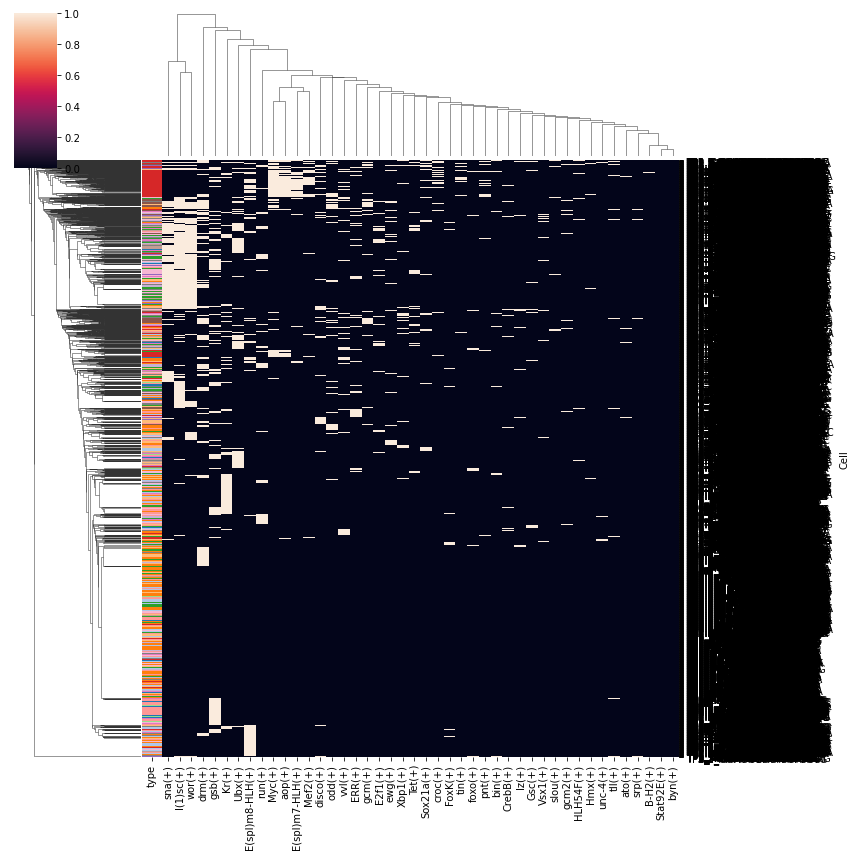

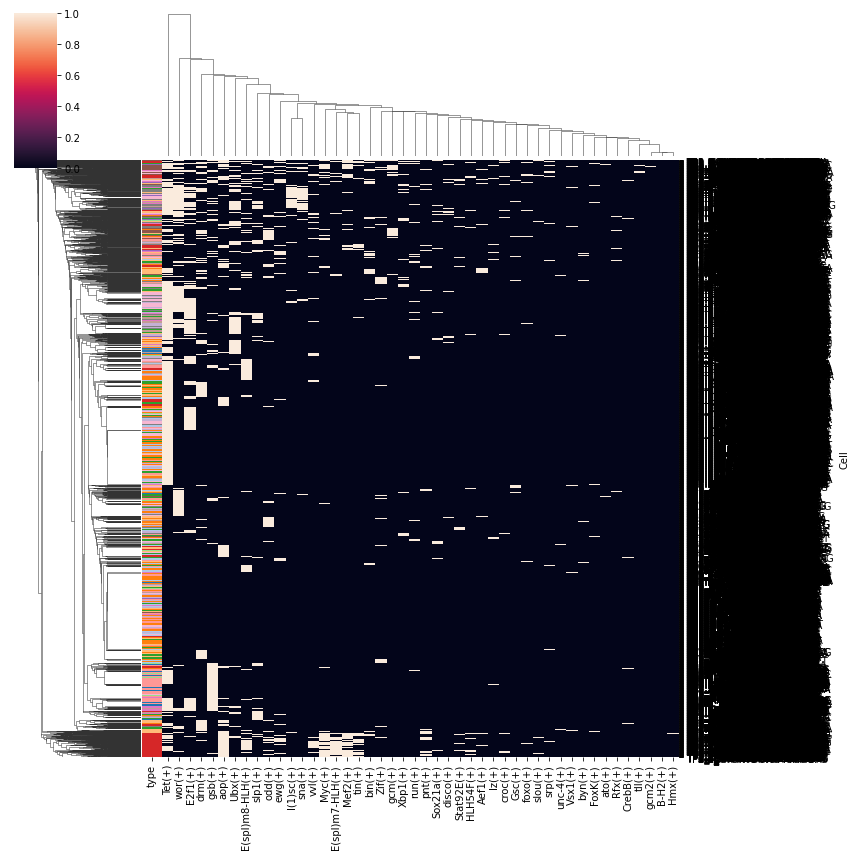

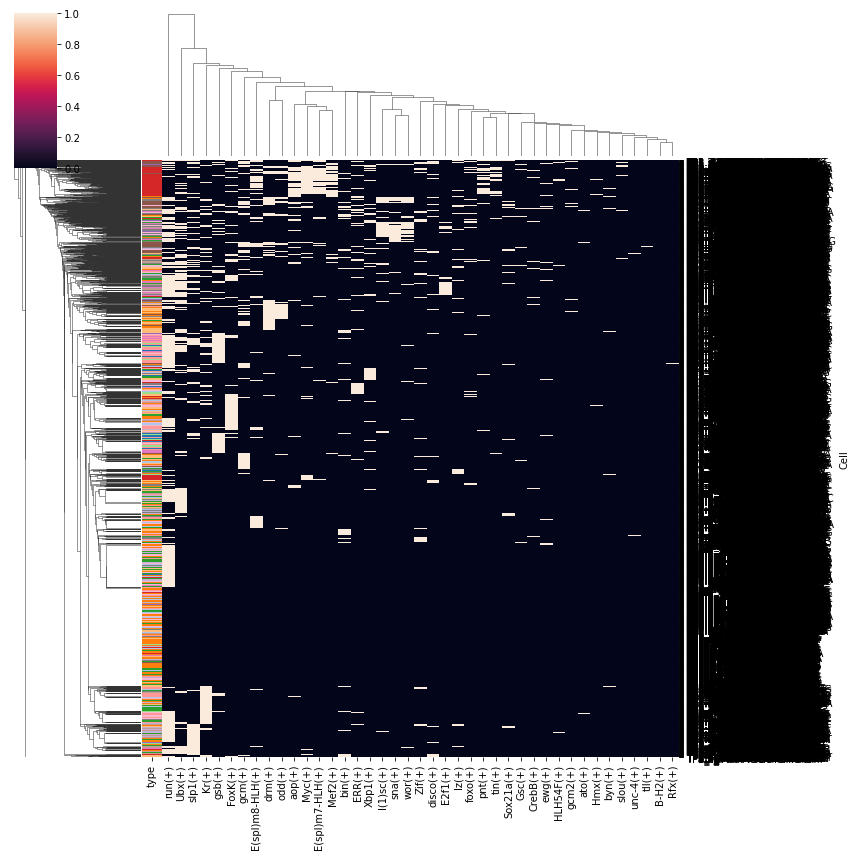

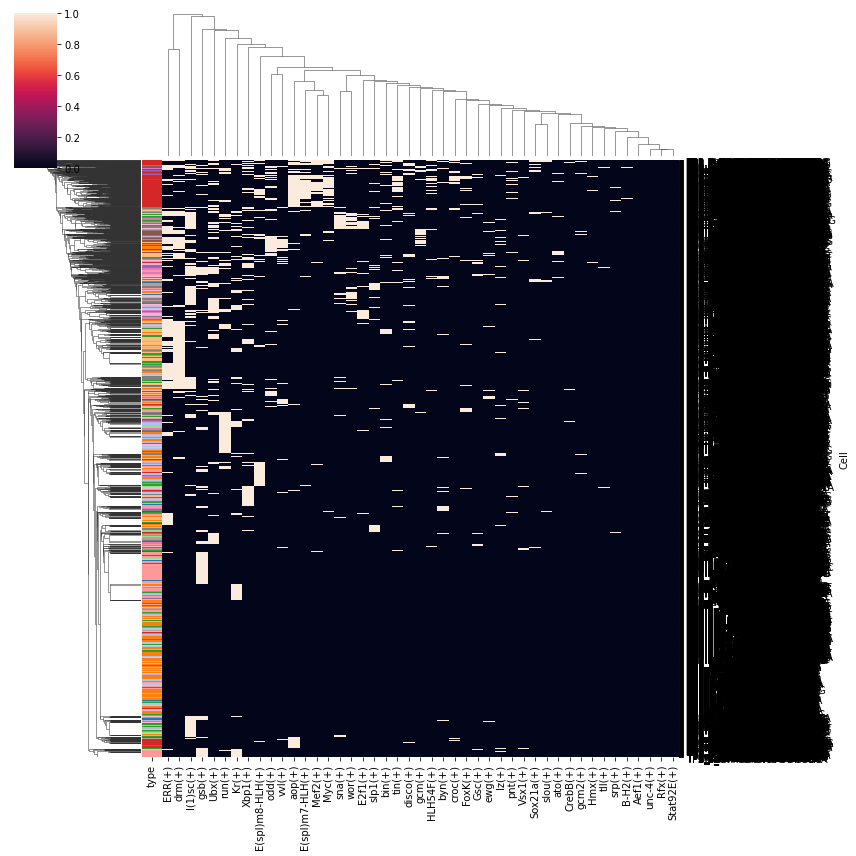

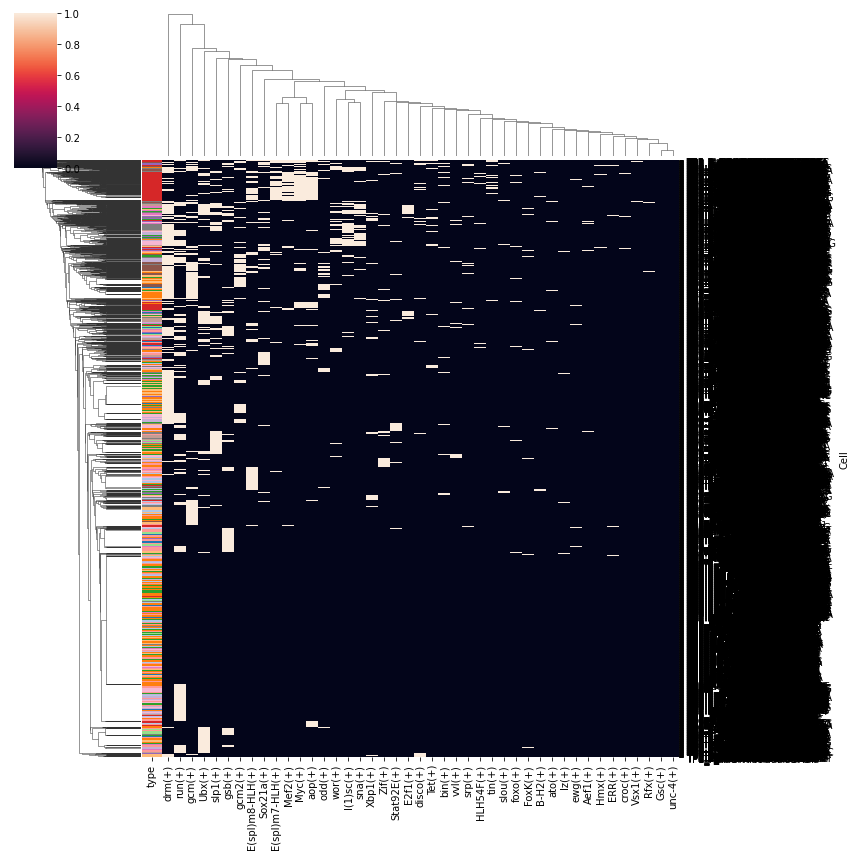

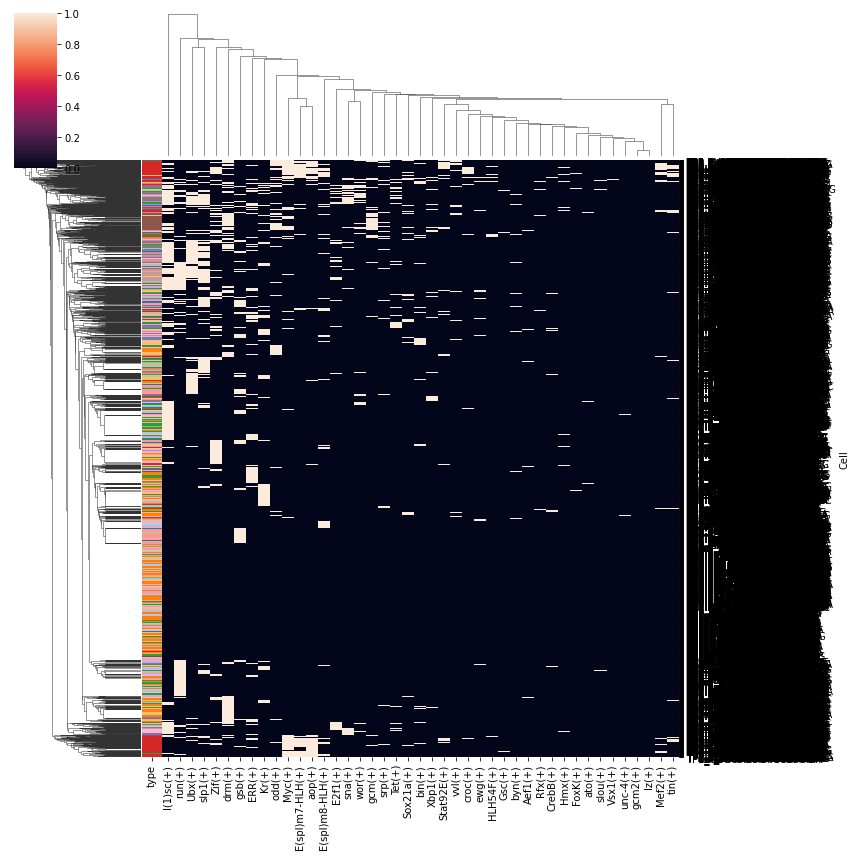

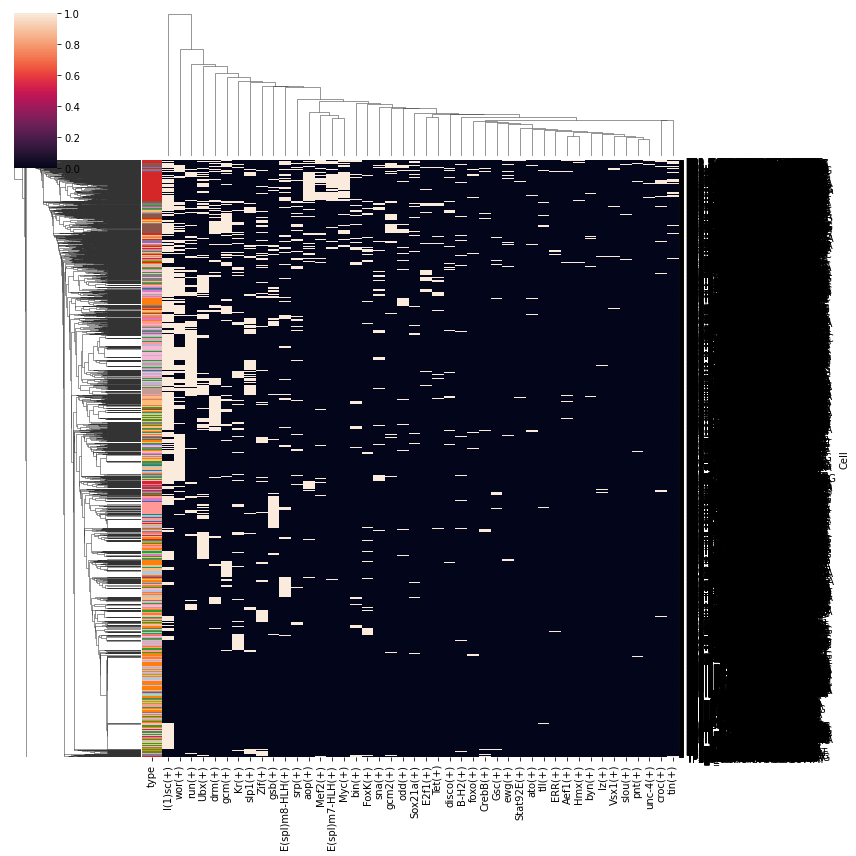

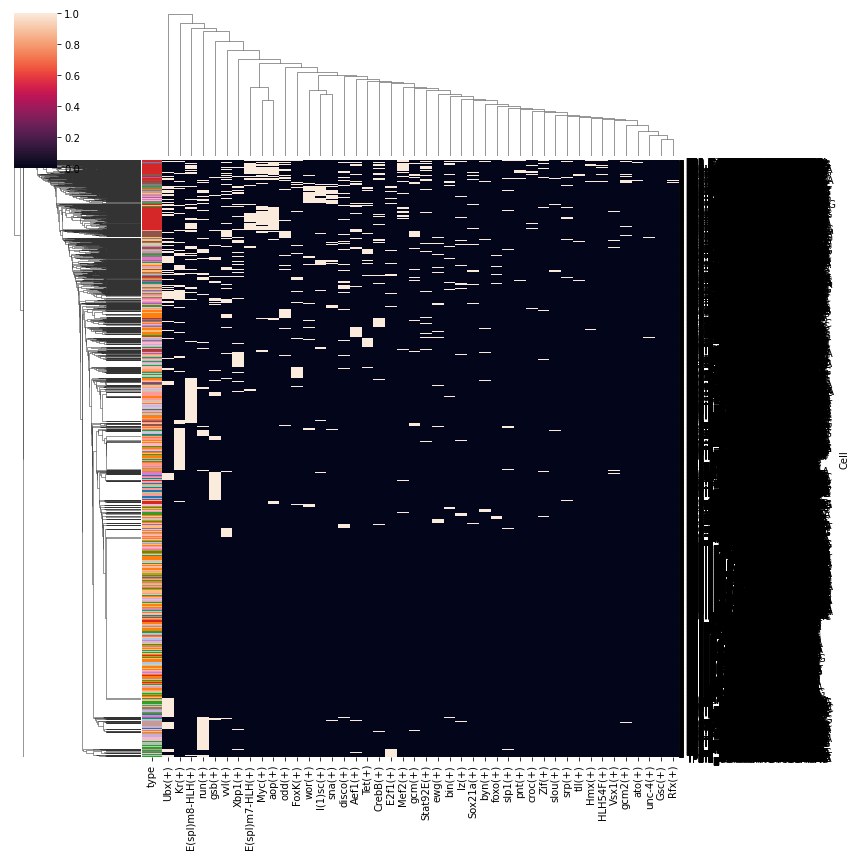

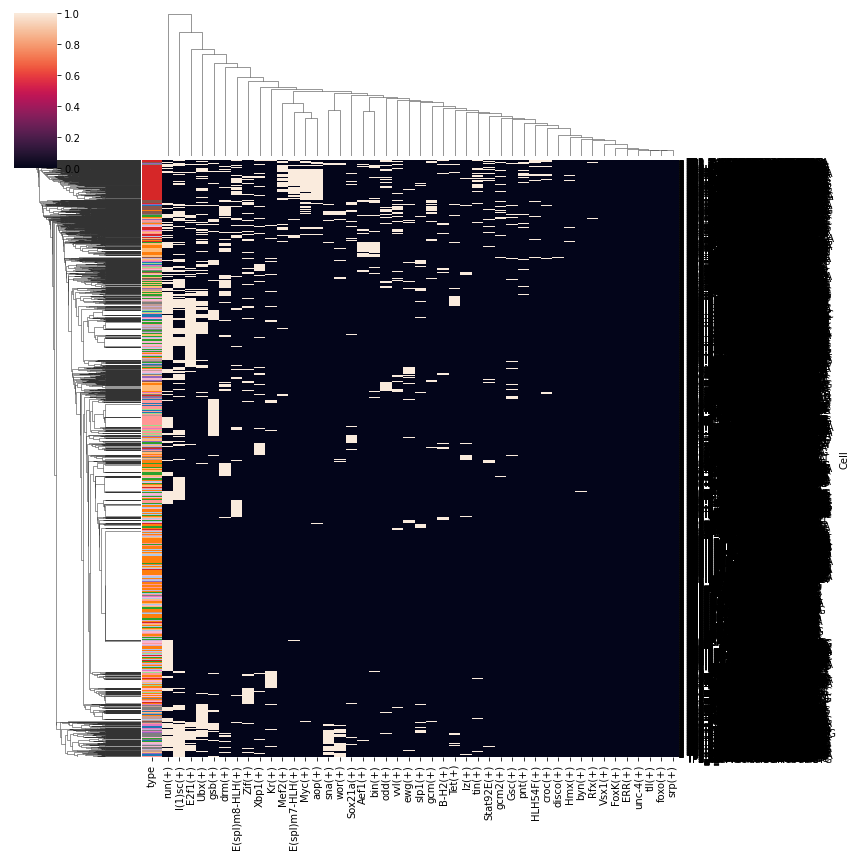

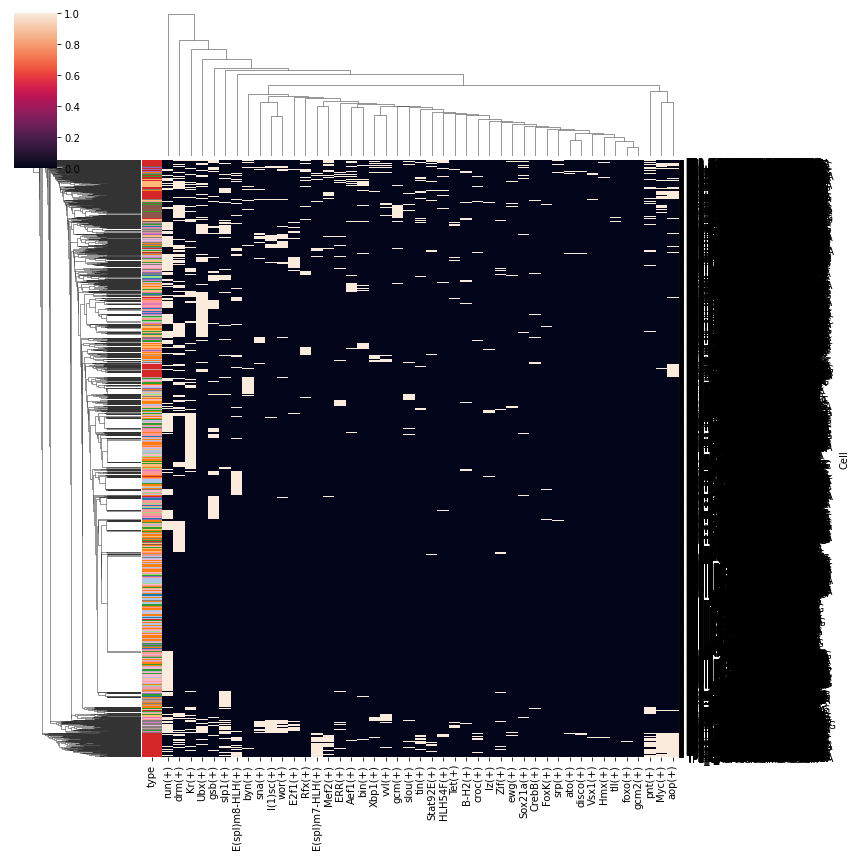

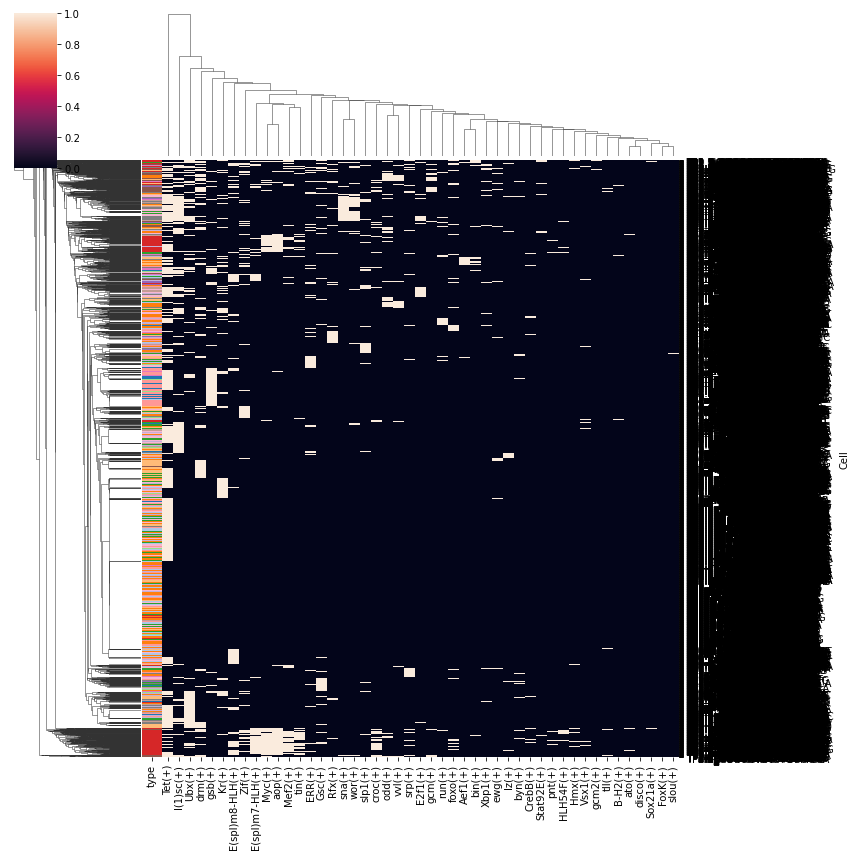

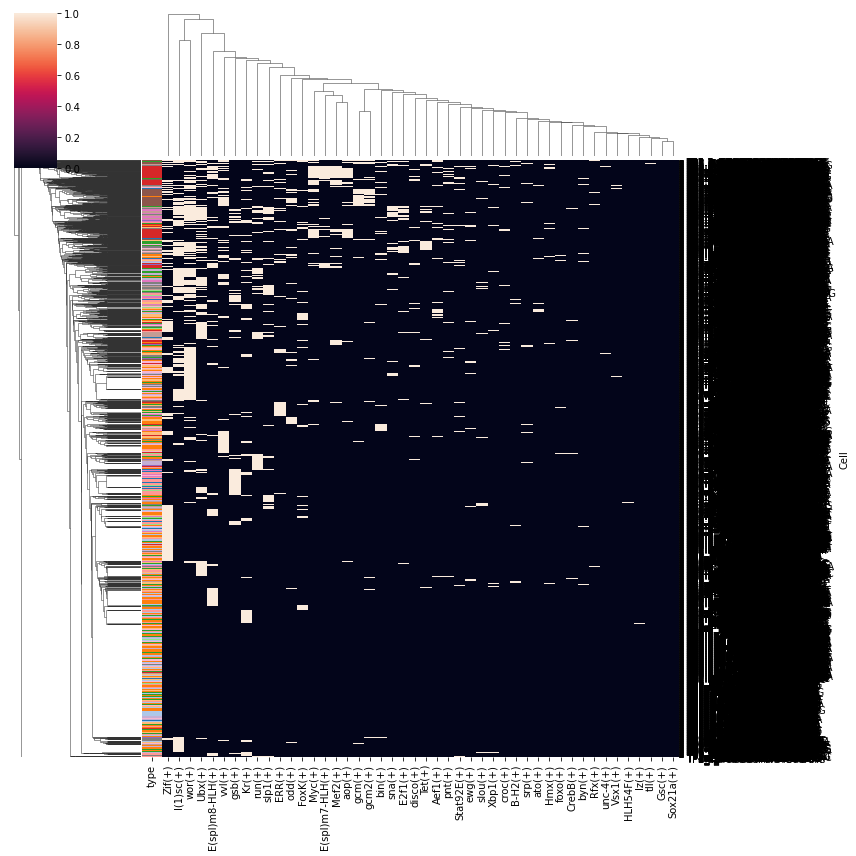

In [70]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("tab20", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

for folder in glob(results_dir_glob):
    auc_mtx_top80 = pd.read_csv(folder + "AUCell_mat_top80.csv", index_col=0)
    binary = binarize(auc_mtx_top80)
    binary_aucell = binary[0]  # because binarize returns a touple of (df, Series of thresholds)
    row_colors = binary_aucell.merge(cell_colors, how='left', left_index=True, right_index=True).type
    ax = sns.clustermap(binary_aucell, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    ax.savefig(folder + "top80_binary_heatmap.png")

----------

# Cluster

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os

Transfer Seurat data to AnnData

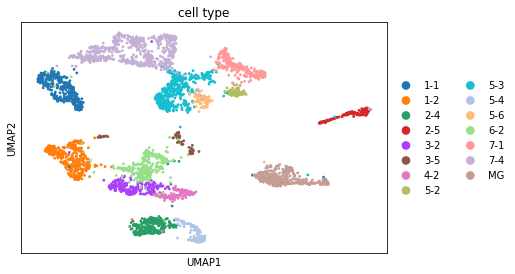

In [75]:
X = io.mmread("../data/to_py/matrix.mtx")
adata = anndata.AnnData(X=X.transpose().tocsr())
metadata = pd.read_csv("../data/to_py/metadata.csv")

with open("../data/to_py/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

adata.obs = metadata
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

pca= pd.read_csv("../data/to_py/pca.csv")
pca.index = adata.obs.index

adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

types = pd.read_csv("../data/to_py/types.csv")
types.index = adata.obs.index
adata.obs['cell_type'] = types

sc.pl.scatter(adata, basis='umap', color=['cell_type'])

In [76]:
import umap

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/danabarilan/opt/miniconda3/envs/devo-

In [96]:
auc_mtx_top80 = pd.read_csv("../../results_2709/run_1/AUCell_mat_top80.csv", index_col=0)

In [97]:
runUmap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx_top80 )
umap_top80 = pd.DataFrame(dr_umap, columns = ['X_aucell', 'Y_aucell'], index=auc_mtx_top80.index)

cluster by AUCell score

In [98]:
adata_aucell = adata.copy()

In [99]:
umap_top80

,X_aucell,Y_aucell
Cell,,
TP1_AAACCTGAGTAACCCT,13.731939,2.930659
TP1_AAACCTGGTACCATCA,12.175121,8.239203
TP1_AAACCTGGTTACGTCA,6.222757,9.326686
TP1_AAACCTGTCAACACTG,13.877115,3.147866
TP1_AAACCTGTCATGCTCC,7.079507,2.963872
...,...,...
TP2.2_TTTGTCAAGGTGTGGT,12.639052,6.149514
TP2.2_TTTGTCACATGTCGAT,2.264340,3.245764
TP2.2_TTTGTCAGTGATAAAC,9.653473,2.942154


In [100]:
adata_aucell.obs = adata_aucell.obs.merge(how='left', right=umap_top80, left_index=True, right_index=True)

In [101]:
adata_aucell.obsm['X_umap'] = np.vstack((adata_aucell.obs['X_aucell'].to_numpy(), adata_aucell.obs['Y_aucell'].to_numpy())).T

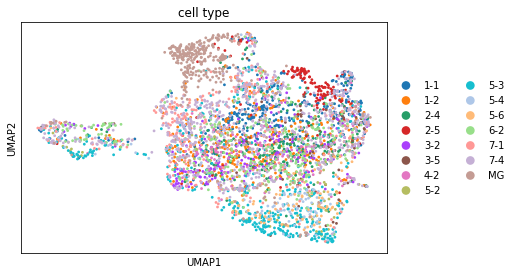

In [102]:
sc.pl.scatter(adata_aucell, basis='umap',color=['cell_type', ])

In [104]:
help(grnboost2)

Help on function grnboost2 in module arboreto.algo:

grnboost2(expression_data, gene_names=None, tf_names='all', client_or_address='local', early_stop_window_length=25, limit=None, seed=None, verbose=False)
    Launch arboreto with [GRNBoost2] profile.
    
    :param expression_data: one of:
           * a pandas DataFrame (rows=observations, columns=genes)
           * a dense 2D numpy.ndarray
           * a sparse scipy.sparse.csc_matrix
    :param gene_names: optional list of gene names (strings). Required when a (dense or sparse) matrix is passed as
                       'expression_data' instead of a DataFrame.
    :param tf_names: optional list of transcription factors. If None or 'all', the list of gene_names will be used.
    :param client_or_address: one of:
           * None or 'local': a new Client(LocalCluster()) will be used to perform the computation.
           * string address: a new Client(address) will be used to perform the computation.
           * a Client instan